In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [380]:
stu1 = pd.read_csv(r'C:\Users\Alon\Downloads\train\train\7554\SimpleTest\11.csv', parse_dates=[' Time'])

In [381]:
print("Len:", len(stu1))
stu1.info()

Len: 824
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   X          824 non-null    object        
 1    Y         822 non-null    float64       
 2    Pressure  822 non-null    float64       
 3    TiltX     822 non-null    float64       
 4    TiltY     822 non-null    float64       
 5    Time      822 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 38.8+ KB


In [382]:
#Fixing the space before any column title:
stu1.columns = ['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time']
stu1.columns

Index(['X', 'Y', 'Pressure', 'TiltX', 'TiltY', 'Time'], dtype='object')

## Converting 'X' to float

In [383]:
#'X' col type is str.
type(stu1['X'][0])

str

In [384]:
#This happens cuz the last 2 rows, which are a summery
stu1[-2:]

,X,Y,Pressure,TiltX,TiltY,Time
822,Time Elapsed till drawing started: 00:08.4231753,NaN,NaN,NaN,NaN,NaT
823,Time Elapsed till drawing submit: 01:48.3390641,NaN,NaN,NaN,NaN,NaT


In [385]:
#If we remove them we can make 'X' col to float easly.
stu = stu1[0:-2]
stu.tail(5)

,X,Y,Pressure,TiltX,TiltY,Time
817,879.033606652038,505.607576,0.625727,-3260.0,1718.0,2022-06-12 00:27:35
818,879.191592562652,505.449590,0.608148,-3260.0,1718.0,2022-06-12 00:27:36
819,879.454902413674,505.186280,0.596918,-3260.0,1718.0,2022-06-12 00:27:36
820,879.454902413674,505.186280,0.586175,-3260.0,1718.0,2022-06-12 00:27:37
821,879.454902413674,505.186280,0.549798,-3260.0,1718.0,2022-06-12 00:27:37


In [386]:
stu['X'] = pd.to_numeric(stu['X'], errors='coerce')
type(stu['X'][3])

numpy.float64

## Adding 'diff' col

In [387]:
stu["lag1"] = stu['Time'].shift(periods = 1)
stu.head()

,X,Y,Pressure,TiltX,TiltY,Time,lag1
0,968.558956,611.089502,0.113756,-4045.0,1362.0,2022-06-12 00:08:25,NaT
1,968.874928,611.142164,0.115709,-4045.0,1362.0,2022-06-12 00:08:26,2022-06-12 00:08:25
2,970.138815,611.036840,0.137194,-4045.0,1362.0,2022-06-12 00:08:27,2022-06-12 00:08:26
3,970.402125,611.036840,0.207263,-4045.0,1362.0,2022-06-12 00:08:28,2022-06-12 00:08:27
4,970.402125,611.036840,0.296376,-4045.0,1362.0,2022-06-12 00:08:29,2022-06-12 00:08:28


In [388]:
stu["diff"] = stu['Time'].sub(stu["lag1"])
stu.head(5)

,X,Y,Pressure,TiltX,TiltY,Time,lag1,diff
0,968.558956,611.089502,0.113756,-4045.0,1362.0,2022-06-12 00:08:25,NaT,NaT
1,968.874928,611.142164,0.115709,-4045.0,1362.0,2022-06-12 00:08:26,2022-06-12 00:08:25,0 days 00:00:01
2,970.138815,611.036840,0.137194,-4045.0,1362.0,2022-06-12 00:08:27,2022-06-12 00:08:26,0 days 00:00:01
3,970.402125,611.036840,0.207263,-4045.0,1362.0,2022-06-12 00:08:28,2022-06-12 00:08:27,0 days 00:00:01
4,970.402125,611.036840,0.296376,-4045.0,1362.0,2022-06-12 00:08:29,2022-06-12 00:08:28,0 days 00:00:01


In [389]:
#Let's make time units of measurement (for comparison)
op1 = stu["diff"][1] - stu["diff"][1] #0.00
op2 = stu["diff"][1] #0.01
op3 = stu["diff"][1] + stu["diff"][1] #0.02
print(op1)
print(op2)
print(op3)

0 days 00:00:00
0 days 00:00:01
0 days 00:00:02


In [390]:
#We decided that handlift will count if the diffrence between one point and he 
stu[stu["diff"] > stu["diff"][1]*10]

,X,Y,Pressure,TiltX,TiltY,Time,lag1,diff
203,683.552373,307.756554,0.111803,-4823.0,3909.0,2022-06-12 00:11:54,2022-06-12 00:10:38,0 days 00:01:16
338,601.610348,455.420718,0.154040,-3668.0,934.0,2022-06-12 00:15:15,2022-06-12 00:13:26,0 days 00:01:49
484,964.188012,608.403742,0.076402,-4124.0,1973.0,2022-06-12 00:20:33,2022-06-12 00:16:50,0 days 00:03:43
578,844.434692,719.415175,0.043931,-4565.0,1165.0,2022-06-12 00:24:02,2022-06-12 00:21:35,0 days 00:02:27
689,789.297609,615.618432,0.135485,-3322.0,1537.0,2022-06-12 00:26:11,2022-06-12 00:25:17,0 days 00:00:54


###### Question C:

In [391]:
print("Hand lifts:", len(stu[stu["diff"] > stu["diff"][1]*10].dropna()))

Hand lifts: 5


#### Making indexlist named handlift:

In [392]:
#First, we will create our 'handlift' according to the way we calculated above.
handlift = stu[stu["diff"] > stu["diff"][1]*10].index

#Then we will insert the '0' index, cuz the draw start at this point.
#The function 'union()' sorts automaticlly.
handlift = handlift.union([0])
handlift

Int64Index([0, 203, 338, 484, 578, 689], dtype='int64')

#### Making indexlist named totallines:

In [393]:
totallines = handlift
totallines

Int64Index([0, 203, 338, 484, 578, 689], dtype='int64')

# Graph viewing

In [394]:
#Those parametrs are only for visualization
xmin = stu['X'].min() - 100
xmax = stu['X'].max() + 100
ymin = stu['Y'].min() - 100
ymax = stu['Y'].max() + 100

(500.293798360088, 1070.823420718328, 204.86014551333898, 819.415174962467)

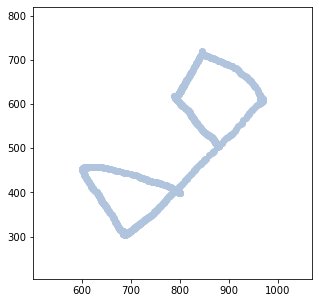

In [395]:
plt.figure(figsize=(5,5))
plt.plot(stu['X'], stu['Y'], 'o', color='lightsteelblue')
ax = plt.gca()
plt.axis([xmin, xmax, ymin, ymax])

##### This graph includes a thick line whenever the hand lifted

In [396]:
def part_print(x1, x2):
    plt.figure(figsize=(5,5))
    plt.plot(stu['X'][x1:x2], stu['Y'][x1:x2], 'o', mew=2)
    ax = plt.gca()
    plt.axis([xmin, xmax, ymin, ymax])
    plt.title(x1)

# Counting Lines

### Helpful functions:

In [397]:
#The function recives 2 points and returns the slope (SHIPUA) of the line bettwen them
def slopee(p1, p2): 
    return (stu['Y'][p1]-stu['Y'][p2]) / (stu['X'][p1]-stu['X'][p2])

In [398]:
def avgLengthPres(p1, p2):
    print(f'Average pressure: {stu.Pressure[p1:p2].mean()}, length: {np.sqrt(pow(stu.X[p1] - stu.X[p2], 2) + pow(stu.Y[p1] - stu.Y[p2], 2))}')

In [399]:
#The function recives a point and returns True if it is "close" to another point* in the draw
#*Not including its continune
def is_close(p1):
    #We assume that 2 point are called "close" if their distance is "DEFINED_CLOSE" or closer.
    SKIP = 40
    DEFINED_CLOSE = 4
    
    if (p1 == 0):
        #If there isn't a close point for the start of the draw, the draw is open.
        if (len(stu[stu.index > stu.index[p1+SKIP]][abs(stu['X'].sub(stu['X'][p1])) <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0):
            print("error1", p1)
            return False
    else:
        #For each line that stop by lifting hand, check if there is a continune
        if ((len(stu[stu.index > stu.index[p1-1]][abs(stu['X'].sub(stu['X'][p1])) <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0)
        and (len(stu[stu.index < stu.index[p1-1] - SKIP][abs(stu['X'].sub(stu['X'][p1])) <= DEFINED_CLOSE][abs(stu['Y'].sub(stu['Y'][p1])) <= DEFINED_CLOSE]) == 0)):
            print("error2", p2)
            return False    
        
    return True

# Counting lines

###### Question A:

In [400]:
lines = len(handlift) #Count of lines till yet, which is counting of hand lifting.
next = 0 #used as an index, always next = i+1

#Those next 3 are set by us
TAIL = 35 #Avoiding the great changes of the edges
SKIP = TAIL #Insted of checking point
STRIGHT = 0.7 #Number that we diagnosed to check diffrences between lines.
    
#print("Chosen tail:", TAIL)

#helpful functions:
    #slopee(p1, p2) - Calculate the slope (SHIPUA) between 2 points.
    #arctan(num) - Trigonomatric function

if (len(handlift) > 1):          
    for j in handlift[:-1]:
        next += 1
        for i in range(j, handlift[next]-2*TAIL, SKIP):
            x1 = i
            x2 = i+SKIP
            #print("(", x1, "," ,x2, "): angle: ", abs(np.arctan(slopee(x1, x2))))
            
            if (abs((abs(np.arctan(slopee(x1, x2)))) - (abs(np.arctan(slopee(x1+SKIP, x2+SKIP))))) > STRIGHT):
                #print("here!")
                totallines = totallines.union([i+SKIP])
                lines += 1
#print("--------------------------")
#Now we will check the part last part:
for i in range(handlift[next], len(stu)-TAIL, SKIP):      
        x1 = i
        x2 = i+SKIP           
        #print("(", x1, "," ,x2, "): angle: ", abs(np.arctan(slopee(x1, x2))))
        
        if (abs((abs(np.arctan(slopee(x1, x2)))) - (abs(np.arctan(slopee(x1+SKIP, x2+SKIP))))) > STRIGHT):
                #print("here!")
                totallines = totallines.union([i+SKIP])
                lines += 1
                
        if (x2 >= len(stu)-2*TAIL):
            #print("stop")
            break
        
print(f'Lines: {lines}')

Lines: 6


## Now we can use visualization for the lines

In [401]:
print(handlift)
print(totallines)

Int64Index([0, 203, 338, 484, 578, 689], dtype='int64')
Int64Index([0, 203, 338, 484, 578, 689], dtype='int64')


(500.293798360088, 1070.823420718328, 204.86014551333898, 819.415174962467)

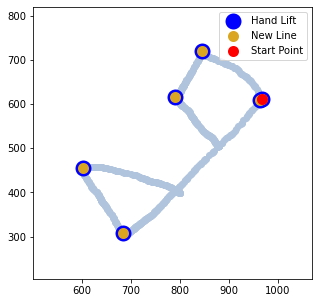

In [411]:
plt.figure(figsize=(5,5))
plt.plot(stu['X'], stu['Y'], 'o', color='lightsteelblue')

plt.plot(stu['X'][handlift], stu['Y'][handlift], 'o', color = 'blue', mew=10, label='Hand Lift')

plt.plot(stu['X'][totallines], stu['Y'][totallines], 'o', color = 'goldenrod', mew=5, label='New Line')

plt.plot(stu['X'][0], stu['Y'][0], 'or', mew=5, label='Start Point')

plt.legend()

ax = plt.gca()
plt.axis([xmin, xmax, ymin, ymax])

# Calculating average and pressure for each line

###### Question B:

In [404]:
next = 1

#Why if? cuz the last line is untill the end of the draw, which its index is not in "totallines"
if (len(totallines) > 1):
    for line in totallines[:-1]:
        print(f'Line {next}:')
        avgLengthPres(line, totallines[next])
        next += 1
        
print(f'Line {next}:')
avgLengthPres(totallines[-1], len(stu)-1)

Line 1:
Average pressure: 0.7995093754800082, length: 416.2206503527214
Line 2:
Average pressure: 0.5203974143222526, length: 168.87628912704747
Line 3:
Average pressure: 0.687324668548695, length: 393.5306449508569
Line 4:
Average pressure: 0.572168193599011, length: 163.29236359597147
Line 5:
Average pressure: 0.5845301088180628, length: 117.53238623544027
Line 6:
Average pressure: 0.6658385200708201, length: 142.5608556663242


# Is the draw opened or closed?

###### Question D:

In [406]:
flag = True
for lift in handlift:
    if (is_close(lift) == False):
        flag = False
        break
if (flag):
    print("The draw is closed")
else:
    print("The draw is opened")

The draw is closed
